In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
"""
TEST Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.06      0.12       194
           1       0.18      1.00      0.30       202
           2       0.87      0.60      0.71       179
           3       0.98      0.82      0.89       205
           4       0.86      0.57      0.69       201
           5       0.97      0.78      0.87       192
           6       0.91      0.58      0.71       197
           7       0.83      0.47      0.60       213
           8       0.97      1.00      0.99       192
           9       0.94      0.90      0.92       201
          10       0.00      0.00      0.00       213
          11       0.99      0.51      0.68       195
          12       0.00      0.00      0.00       185
          13       0.80      0.41      0.55       222
          14       0.46      0.94      0.62       209

    accuracy                           0.58      3000
   macro avg       0.71      0.58      0.58      3000
weighted avg       0.71      0.58      0.57      3000
"""
"""
map: {"0": "BENIGN", "1": "Bot", "2": "DDoS", "3": "DoS GoldenEye", "4": "DoS Hulk", "5": "DoS Slowhttptest", "6": "DoS slowloris", "7": "FTP-Patator", "8": "Heartbleed", "9": "Infiltration", "10": "PortScan", "11": "SSH-Patator", "12": "Web Attack \ufffd Brute Force", "13": "Web Attack \ufffd Sql Injection", "14": "Web Attack \ufffd XSS"}
"""

'\nmap: {"0": "BENIGN", "1": "Bot", "2": "DDoS", "3": "DoS GoldenEye", "4": "DoS Hulk", "5": "DoS Slowhttptest", "6": "DoS slowloris", "7": "FTP-Patator", "8": "Heartbleed", "9": "Infiltration", "10": "PortScan", "11": "SSH-Patator", "12": "Web Attack � Brute Force", "13": "Web Attack � Sql Injection", "14": "Web Attack � XSS"}\n'

In [3]:
index = ['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'Web Attack & Brute Force', 'Web Attack & Sql Injection', 'Web Attack & XSS']

In [4]:
data = pd.DataFrame([
    [0.06],
    [1.00],
    [0.60],
    [0.82],
    [0.57],
    [0.78],
    [0.58],
    [0.47],
    [1.00],
    [0.90],
    [0.00],
    [0.51],
    [0.00],
    [0.41],
    [0.94],
], columns=["us"], index=index)
error = pd.DataFrame([
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
    [0.000001],
], columns=["us"], index=index)

In [5]:
bar_width = 0.2
width = 0.3
y_LL_MSE = 0
y_UL_MSE = 1.02
y_interval_MSE = 0.1
y_LL_MAE = 0
y_UL_MAE = 1.05
y_interval_MAE = 0.1
my_colors = ['#001219', '#03045e', '#f4a261', '#e76f51', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#f18701', '#fa7f6f', '#e07a5f',
             '#fdf0d5', '#a3b18a', '#d4a373']
# 随机替换颜色顺序
np.random.seed(100)
np.random.shuffle(my_colors)
my_hatches = ['x', 'xxx', '+', '//', '-', 'xxx', '+', '//', '-', 'xxx', '+', '//', '-', 'xxx', '+']
my_line_style = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
my_marker_style = ['o', '*', 's', 'D', 'P', '*', 's', 'D', 'P', '*', 's', 'D', 'P', '*', 's']

In [6]:
x = []
for i in range(0, len(data)):
    temp = []
    for j in range(len(data.columns)):
        temp.append(i * width + j * bar_width)
    x.append(temp)
x = np.array(x).T
data = data.T
error = error.T

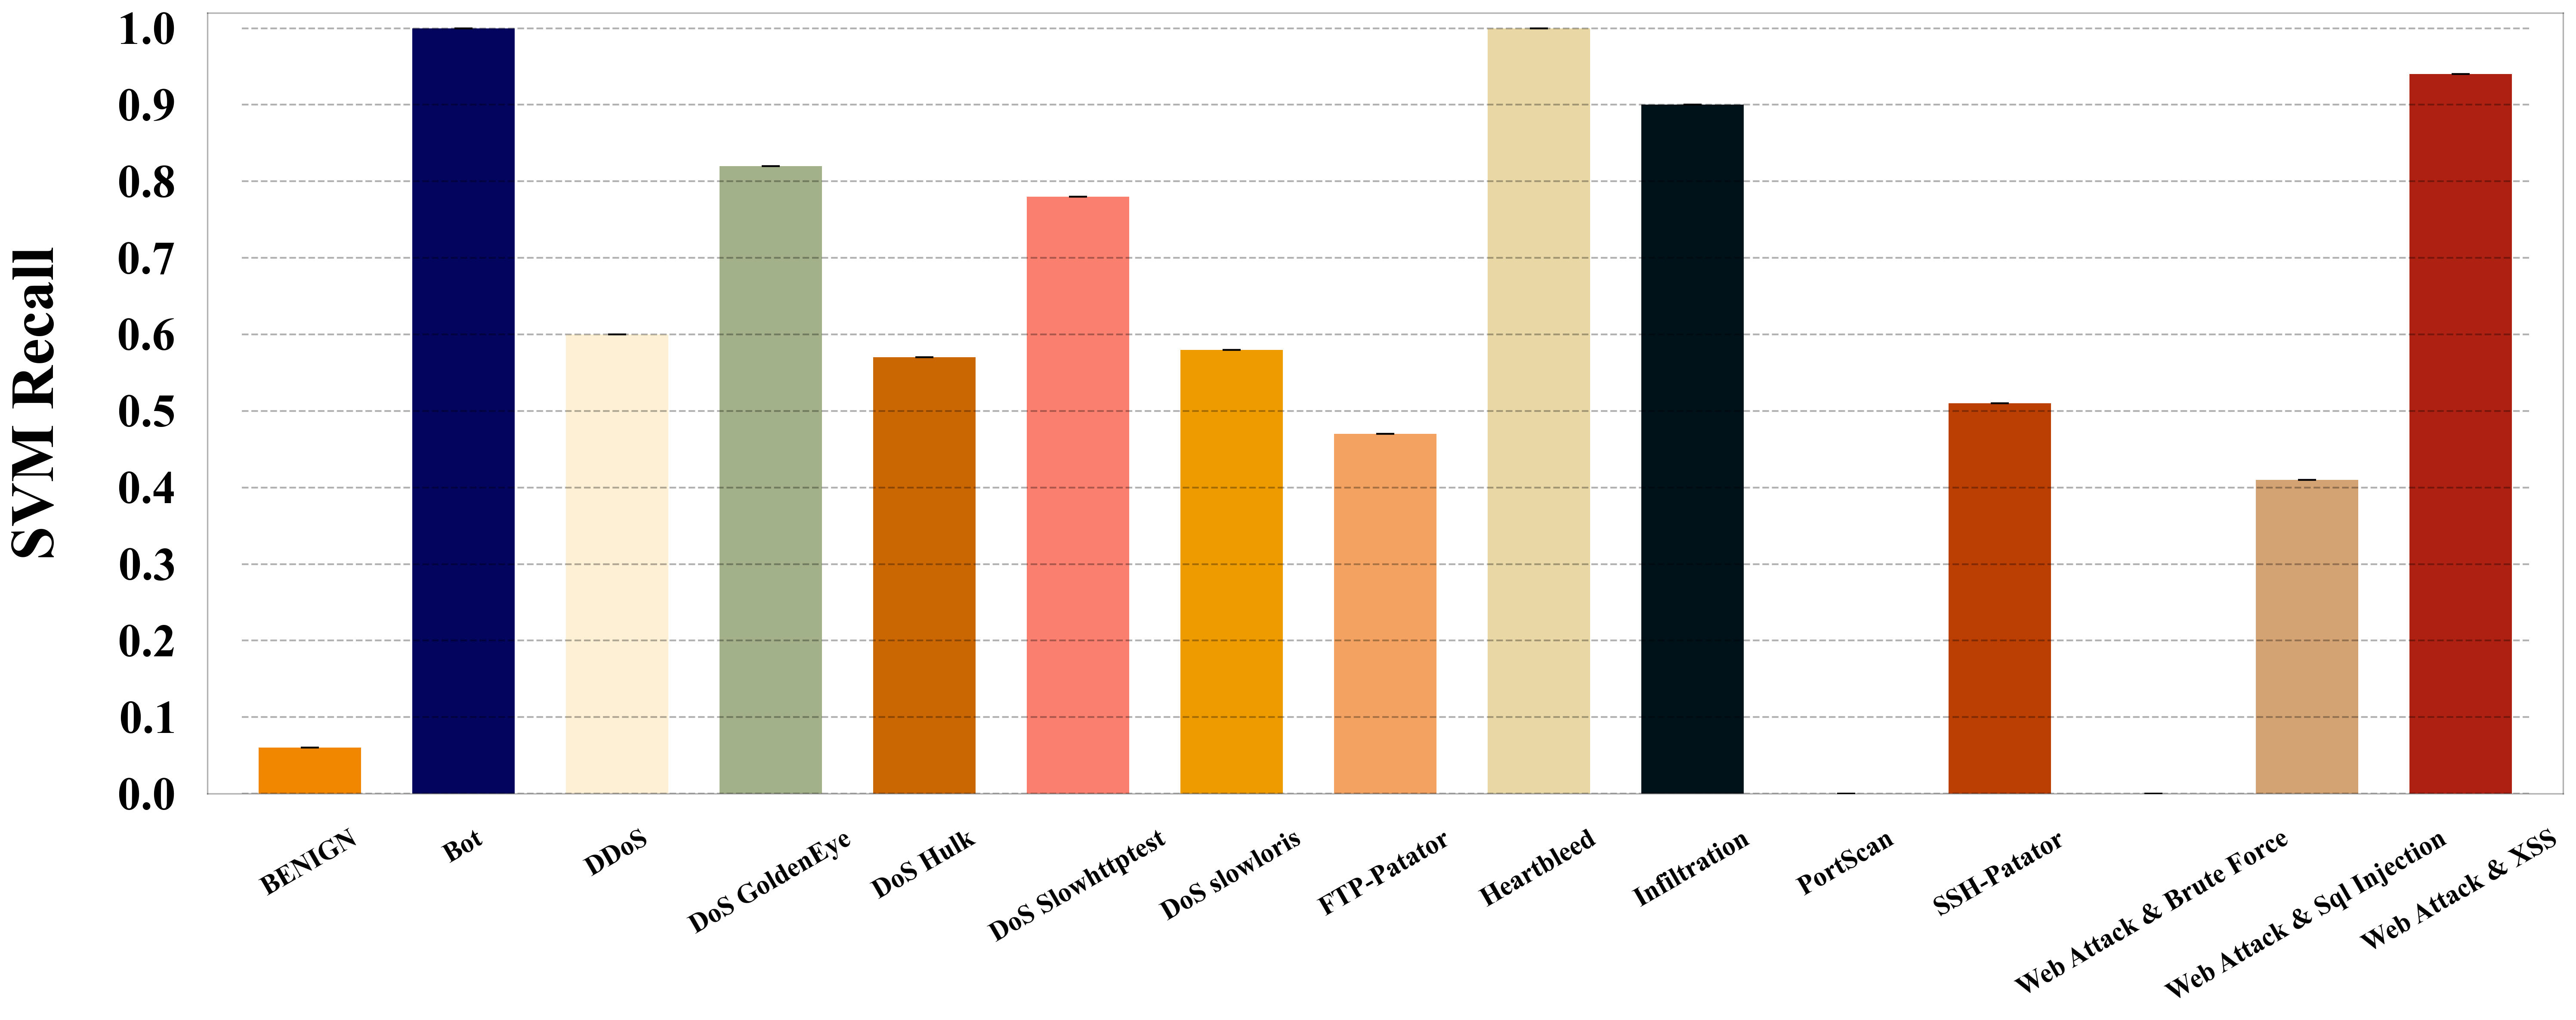

In [7]:
plt.rcParams['font.family'] = 'Times New Roman'

# Draw Plot and Annotate
fig, ax = plt.subplots(1, 1, figsize=(20, 8), dpi=300)

# plt.bar(x[0] + bar_width, data.loc['us'], width=bar_width, label='us', color=my_colors, hatch=my_hatches)
plt.bar(x[0] + bar_width, data.loc['us'], width=bar_width, label='us', color=my_colors)
plt.errorbar(x[0] + bar_width, data.loc['us'], yerr=error.loc['us'], fmt='none', ecolor='k', capsize=5)
# for label in data.index:
#     plt.bar(x[data.index.get_loc(label)] + bar_width, data.loc[label], width=bar_width, label=label,
#             color=my_colors[data.index.get_loc(label)], hatch=my_hatches[data.index.get_loc(label)])
#     plt.errorbar(x[data.index.get_loc(label)] + bar_width, data.loc[label],
#                  yerr=error.loc[label], fmt='none', ecolor='k', capsize=5)

# Decorations
plt.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False,
                labelleft=True)

# Draw Tick lines
for y in np.arange(y_LL_MSE, y_UL_MSE, y_interval_MSE):
    plt.hlines(y, xmin=-x[0][0] + bar_width * 1 / 3, xmax=x[-1][-1] + bar_width * 5 / 3, colors='black', alpha=0.3, linestyles="--", lw=1)

# Lighten borders
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)
plt.gca().yaxis.set_label_coords(-0.06, 0.1)
plt.gca().xaxis.set_label_coords(0.5, -0.1)

plt.ylabel('SVM Recall', fontsize=34, fontweight='bold')

plt.xticks(x[0] + bar_width, data.columns, fontsize=15, fontweight='bold', rotation=30)
plt.gca().tick_params(axis='x', which='major', pad=15)
plt.xlim(-x[0][0], x[-1][-1] + bar_width * 2)

plt.yticks(np.arange(y_LL_MSE, y_UL_MSE, y_interval_MSE), fontsize=26, fontweight='bold')
plt.ylim(y_LL_MSE, y_UL_MSE)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)
plt.gca().yaxis.offsetText.set_fontsize(18)
plt.gca().tick_params(axis='y', which='major', pad=15)

plt.tight_layout()
plt.show()